## Assignment 6.3

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path
import os

In [18]:
#instantiate the model
model = ResNet50(weights='imagenet')

In [19]:
#understanding the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [20]:
def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return(img)

def predict_image(processed_img):
    preds = model.predict(processed_img)
    prediction = decode_predictions(preds, top=1)[0][0]
    _, description, probability = prediction
    return description, probability

In [21]:
import pandas as pd
from IPython.display import Image, display

current_dir = Path(os.getcwd()).absolute()
images_dir = current_dir.joinpath('images')
images_dir.mkdir(parents=True, exist_ok=True)

In [23]:
predictions_dir = current_dir.joinpath('results/predictions/resnet50')
predictions_dir.mkdir(parents=True, exist_ok=True)
predictions_dir

WindowsPath('C:/Users/aarti/DSC650-T302 Big Data (2241-1)/Week 6/results/predictions/resnet50')

1/1 [==============================] - 0s 399ms/step


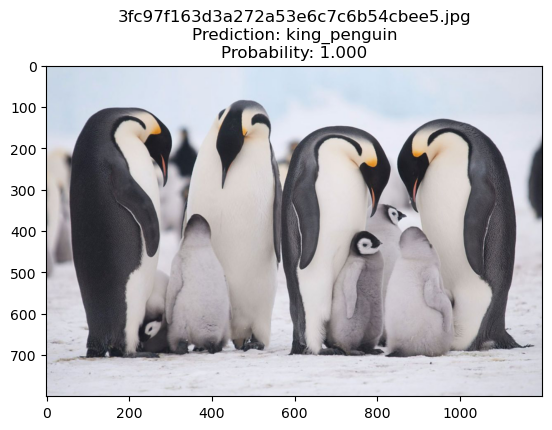

1/1 [==============================] - 0s 417ms/step


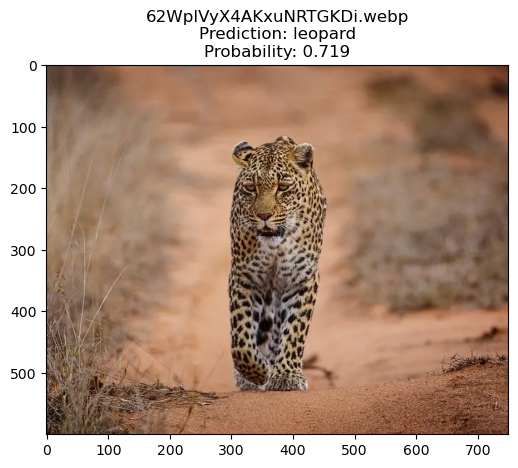

1/1 [==============================] - 0s 425ms/step


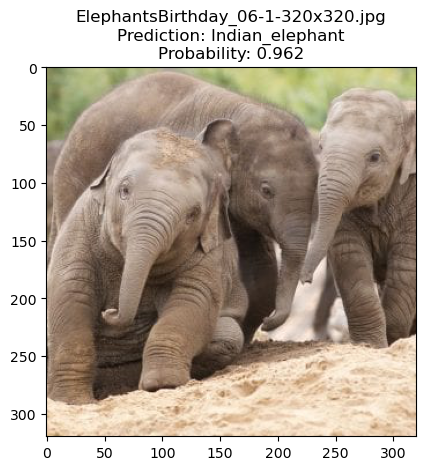

1/1 [==============================] - 0s 429ms/step


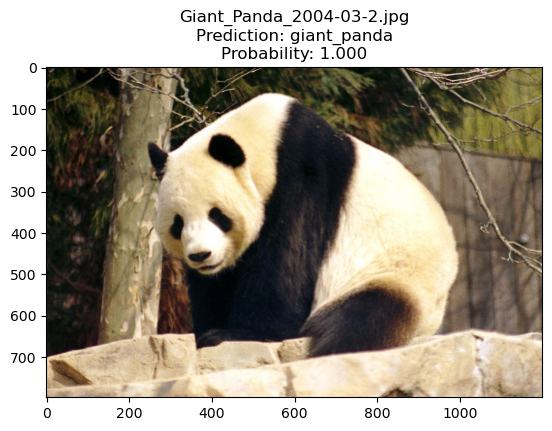

1/1 [==============================] - 0s 432ms/step


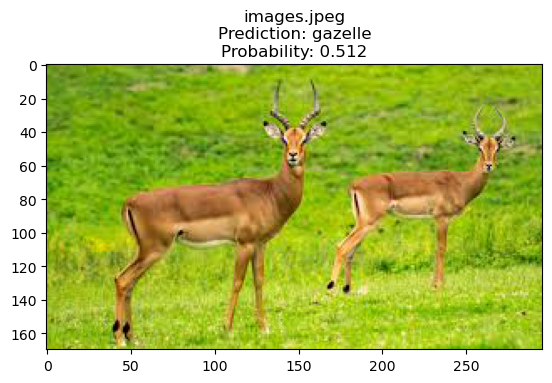

1/1 [==============================] - 0s 441ms/step


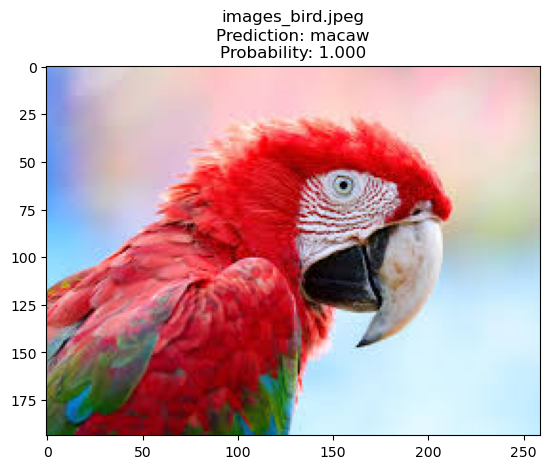

1/1 [==============================] - 0s 449ms/step


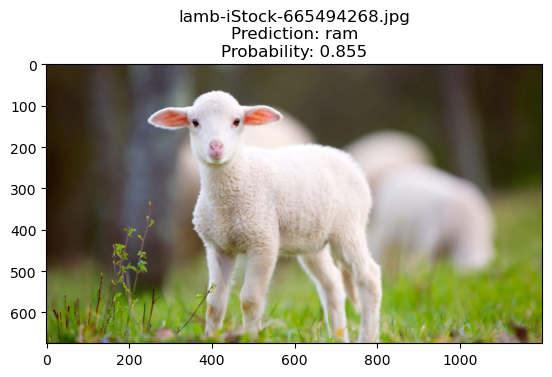

1/1 [==============================] - 0s 494ms/step


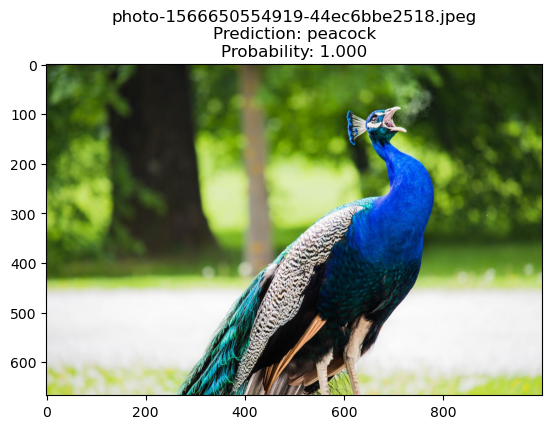

1/1 [==============================] - 0s 452ms/step


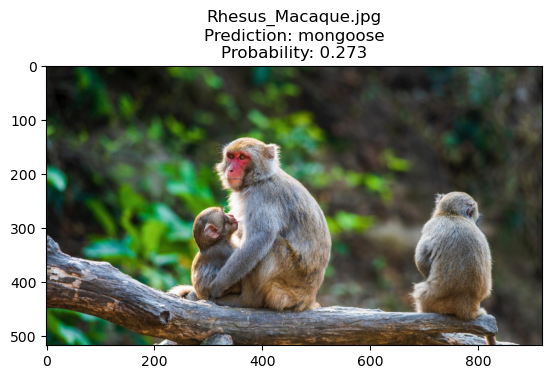

1/1 [==============================] - 1s 587ms/step


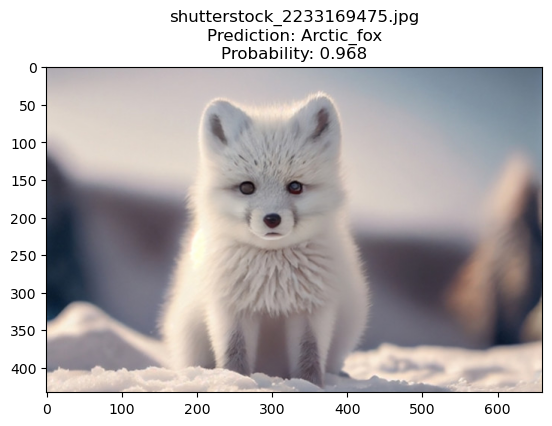

In [25]:
for root, dirs, pictures in os.walk(images_dir):
    for picture in pictures:
        image_path = Path(root).joinpath(picture)
        img = process_image(image_path)
        description, probability = predict_image(img)
        #writing predictions to text file in directory
        file_name = current_dir.joinpath('results/predictions/resnet50/Assignment_6-3_predictions.txt')  
        #open the file
        open_file = open(file_name,'a')
        #write information to file 
        open_file.write(str(image_path) + " -- Description : " + description +  "-- Probability : " + str(probability) + "\n")
        
        pic = mpimg.imread(image_path)
        plt.imshow(pic)
        plt.title(f'{picture}\nPrediction: {description:^}\nProbability: {probability:.3f}')
        plt.show()
    #close file once all activities are completed
    open_file.close()

In [26]:
#save the model  
model.save('results/Assignment_6-3_resnet50_model.h5')